# Hate speech classification



Your goal is to create a text classifier of hate speech or offensive language in internet discussions. It is a binary classfication task with the goal of achieving at least 90% recall. We will try to optimize precision for this recall threshold. The original data set comes from Kaggle.

## Data preparation

In [1]:
!gdown https://drive.google.com/uc?id=1FH5aPpWamiew6iVUd6HGQ7lvc2IaqLCO

Downloading...
From: https://drive.google.com/uc?id=1FH5aPpWamiew6iVUd6HGQ7lvc2IaqLCO
To: /content/hatespeech.txt
48.5MB [00:00, 94.2MB/s]


In [2]:
import pandas as pd

data = pd.read_csv('hatespeech.txt')
target = data['label']
data = data['text']
data.head()

0    `- This is not ``creative``.  Those are the di...
1    `  :: the term ``standard model`` is itself le...
2      True or false, the situation as of March 200...
3     Next, maybe you could work on being less cond...
4                 This page will need disambiguation. 
Name: text, dtype: object

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
print('Train size: {}'.format(len(X_train)))
print('Test size: {}'.format(len(X_test)))

Train size: 92691
Test size: 23173


In [4]:
min_recall = 0.9

## Task 1: Conventional classifier

Implement the classifier using a conventional method such as Support Vector machines, Random Forest or Gradient Boosted Trees. Evaluate the overall quality of the model using standard metrics. Then modify the model to have 90% recall and report the corresponding precision.

### Random Forest Classifier


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.tokenize.casual import casual_tokenize
from sklearn.ensemble import RandomForestClassifier

rfModel = Pipeline([('vec', CountVectorizer(tokenizer=lambda x: casual_tokenize(x, preserve_case=False))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(n_estimators=500))
                    ])

rfModel.fit(X_train, y_train)

y_pred = rfModel.predict(X_test)

In [6]:
from sklearn import metrics

print("ML MODEL REPORT")
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
print(metrics.classification_report(y_test, y_pred))

ML MODEL REPORT
Accuracy: 0.9136926595606957
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     20080
           1       0.96      0.37      0.53      3093

    accuracy                           0.91     23173
   macro avg       0.93      0.68      0.74     23173
weighted avg       0.92      0.91      0.90     23173



In [7]:
import numpy as np
y_pred_proba = rfModel.predict_proba(X_test)

def get_scores(y_true, y_proba, thresholds):
    precisions = []
    recalls = []
    for threshold in thresholds:
        tp = sum(y_proba[y_true == 1] >= threshold)
        fp = sum(y_proba[y_true == 0] >= threshold)
        fn = sum(y_proba[y_true == 1] < threshold)
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        precisions.append(precision)
        recalls.append(recall)
    return (precisions, recalls)

thresholds = np.arange(0.005, 0.995, 0.001)
precisions, recalls = get_scores(y_test, y_pred_proba[:, 1], thresholds)

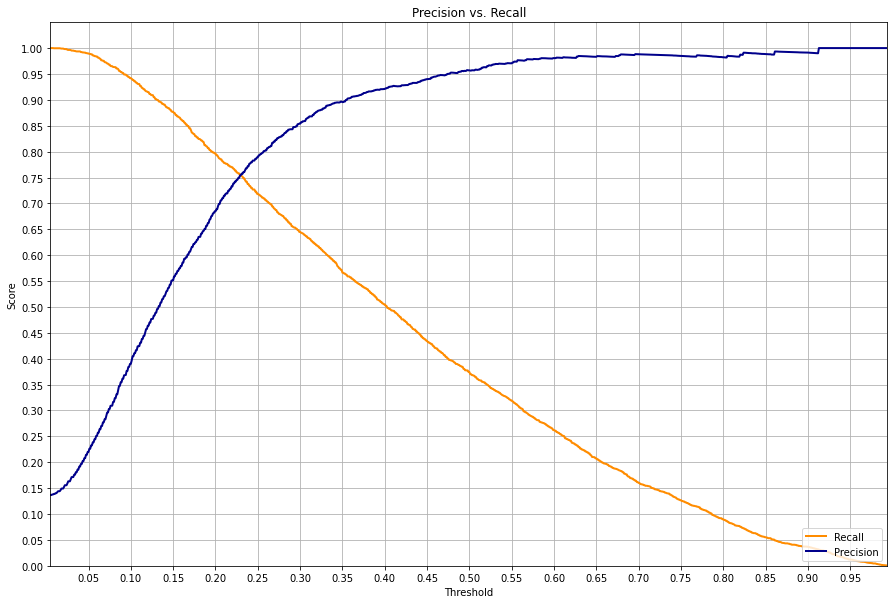

In [8]:
 %matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
lw = 2
plt.plot(thresholds, recalls, color='darkorange', lw=lw, label='Recall')
plt.plot(thresholds, precisions, color='darkblue', lw=lw, label='Precision')
plt.grid()
plt.xticks(np.arange(0, 1.05, 0.05))
plt.yticks(np.arange(0, 1.05, 0.05))
plt.xlim([min(thresholds), max(thresholds)])
plt.ylim([0.0, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs. Recall')
plt.legend(loc="lower right")
plt.show()

In [9]:
for i in range(len(recalls)):
  if recalls[i] < min_recall:
    if i > 0:
      print("Recall: {}, precision: {}.".format(recalls[i-1], precisions[i-1]))
    else:
      print ("Cannot achieve recall greater than {}.".format(min_recall))
    break

Recall: 0.9013902360168121, precision: 0.48903701105069286.


### Support Vector Machines classifier

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.tokenize.casual import casual_tokenize
from sklearn.svm import SVC

                          
svmModel = Pipeline([('vec', CountVectorizer(tokenizer=lambda x: casual_tokenize(x, preserve_case=False))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SVC(kernel='linear', probability=True))
                    ])

svmModel.fit(X_train, y_train)

y_pred = svmModel.predict(X_test)

In [11]:
from sklearn import metrics

print("ML MODEL REPORT")
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
print(metrics.classification_report(y_test, y_pred))

ML MODEL REPORT
Accuracy: 0.9437276140335735
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     20080
           1       0.89      0.66      0.76      3093

    accuracy                           0.94     23173
   macro avg       0.92      0.82      0.86     23173
weighted avg       0.94      0.94      0.94     23173



In [12]:
import numpy as np
y_pred_proba = svmModel.predict_proba(X_test)

thresholds = np.arange(0.005, 0.995, 0.001)
precisions, recalls = get_scores(y_test, y_pred_proba[:, 1], thresholds)

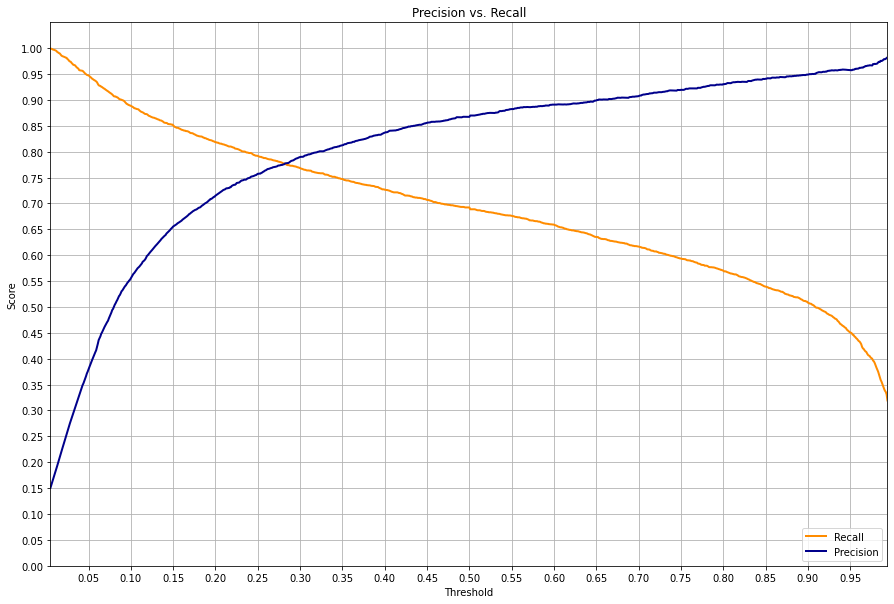

In [13]:
 %matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
lw = 2
plt.plot(thresholds, recalls, color='darkorange', lw=lw, label='Recall')
plt.plot(thresholds, precisions, color='darkblue', lw=lw, label='Precision')
plt.grid()
plt.xticks(np.arange(0, 1.05, 0.05))
plt.yticks(np.arange(0, 1.05, 0.05))
plt.xlim([min(thresholds), max(thresholds)])
plt.ylim([0.0, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs. Recall')
plt.legend(loc="lower right")
plt.show()

In [14]:
for i in range(len(recalls)):
  if recalls[i] < min_recall:
    if i > 0:
      print("Recall: {}, precision: {}.".format(recalls[i-1], precisions[i-1]))
    else:
      print ("Cannot achieve recall greater than {}.".format(min_recall))
    break

Recall: 0.9000969932104753, precision: 0.5302857142857142.


## Task 2: Convolutional neural network classifier

Implement a neural network classifier with a convolution over text sequences.

In [15]:
# set hyperparameters
vocab_size = 5000
embedding_dim = 64
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

Tokenize texts.

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
X_train_nn = tokenizer.texts_to_sequences(X_train)
X_test_nn= tokenizer.texts_to_sequences(X_test)

Pad and truncate token sequences.

In [17]:
X_train_nn = pad_sequences(X_train_nn, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_test_nn = pad_sequences(X_test_nn, maxlen=max_length, padding=padding_type, truncating=trunc_type)

Define the model.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, Dropout, Activation, Embedding, MaxPooling1D

cnnModel = Sequential()
cnnModel.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
cnnModel.add(Dropout(0.5))
cnnModel.add(Conv1D(32, 3, padding="same"))
cnnModel.add(MaxPooling1D())
cnnModel.add(Conv1D(32, 3, padding="same"))
cnnModel.add(MaxPooling1D())
cnnModel.add(Flatten())
cnnModel.add(Dense(32,activation="tanh"))
cnnModel.add(Dense(1, activation="sigmoid"))
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           320000    
_________________________________________________________________
dropout (Dropout)            (None, 100, 64)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 32)           6176      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

Train the model

In [19]:
import tensorflow as tf
optimizer = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
cnnModel.compile(loss="binary_crossentropy", optimizer=optimizer,
    metrics=['accuracy'],
)

cnnModel.fit(X_train_nn, y_train, epochs=5, validation_data=(X_test_nn, y_test), verbose=1)

Epoch 1/5
2897/2897 [==============================] - 18s 6ms/step - loss: 0.2095 - accuracy: 0.9244 - val_loss: 0.1871 - val_accuracy: 0.9344
Epoch 2/5
2897/2897 [==============================] - 18s 6ms/step - loss: 0.1621 - accuracy: 0.9402 - val_loss: 0.1605 - val_accuracy: 0.9419
Epoch 3/5
2897/2897 [==============================] - 18s 6ms/step - loss: 0.1490 - accuracy: 0.9446 - val_loss: 0.1637 - val_accuracy: 0.9407
Epoch 4/5
2897/2897 [==============================] - 19s 6ms/step - loss: 0.1355 - accuracy: 0.9497 - val_loss: 0.1667 - val_accuracy: 0.9398
Epoch 5/5
2897/2897 [==============================] - 19s 6ms/step - loss: 0.1239 - accuracy: 0.9537 - val_loss: 0.1863 - val_accuracy: 0.9406


Evaluate the model

In [20]:
import numpy as np
y_pred_proba = cnnModel.predict(X_test_nn)

thresholds = np.arange(0.005, 0.995, 0.001)
precisions, recalls = get_scores(y_test, y_pred_proba, thresholds)

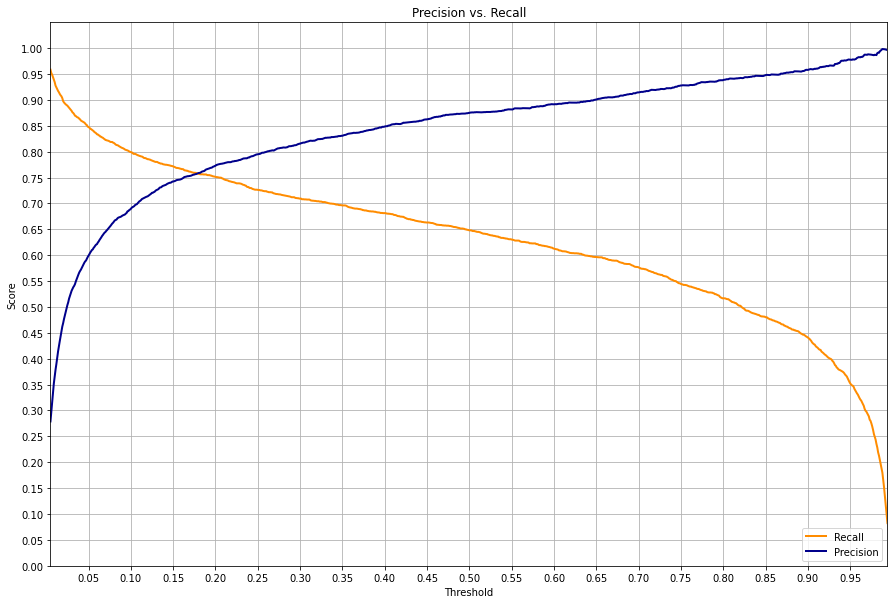

In [21]:
plt.figure(figsize=(15,10))
lw = 2
plt.plot(thresholds, recalls, color='darkorange', lw=lw, label='Recall')
plt.plot(thresholds, precisions, color='darkblue', lw=lw, label='Precision')
plt.grid()
plt.xticks(np.arange(0, 1.05, 0.05))
plt.yticks(np.arange(0, 1.05, 0.05))
plt.xlim([min(thresholds), max(thresholds)])
plt.ylim([0.0, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs. Recall')
plt.legend(loc="lower right")
plt.show()

In [22]:
for i in range(len(recalls)):
  if recalls[i] < min_recall:
    if i > 0:
      print("Recall: {}, precision: {}.".format(recalls[i-1], precisions[i-1]))
    else:
      print ("Cannot achieve recall greater than {}.".format(min_recall))
    break

Recall: [0.9033301], precision: [0.46212372].


## Task 3: Recurrent neural network classifier

Implement a neural network classifier with LSTM or GRU layers.

Define the model.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional

rnnModel = Sequential()
rnnModel.add(Embedding(vocab_size, embedding_dim))
rnnModel.add(Dropout(0.5))
rnnModel.add(Bidirectional(LSTM(32, return_sequences=True)))
rnnModel.add(Bidirectional(LSTM(32)))
rnnModel.add(Dense(1, activation="sigmoid"))
rnnModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          24832     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 369,729
Trainable params: 369,729
Non-trainable params: 0
_________________________________________________________________


Train the model

In [24]:
import tensorflow as tf
optimizer = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
rnnModel.compile(loss="binary_crossentropy", optimizer=optimizer,
    metrics=['accuracy'],
)

rnnModel.fit(X_train_nn, y_train, epochs=5, validation_data=(X_test_nn, y_test), verbose=1)

Epoch 1/5
2897/2897 [==============================] - 62s 21ms/step - loss: 0.2008 - accuracy: 0.9278 - val_loss: 0.1593 - val_accuracy: 0.9417
Epoch 2/5
2897/2897 [==============================] - 61s 21ms/step - loss: 0.1613 - accuracy: 0.9403 - val_loss: 0.1621 - val_accuracy: 0.9405
Epoch 3/5
2897/2897 [==============================] - 61s 21ms/step - loss: 0.1505 - accuracy: 0.9437 - val_loss: 0.1614 - val_accuracy: 0.9412
Epoch 4/5
2897/2897 [==============================] - 64s 22ms/step - loss: 0.1414 - accuracy: 0.9464 - val_loss: 0.1545 - val_accuracy: 0.9422
Epoch 5/5
2897/2897 [==============================] - 65s 22ms/step - loss: 0.1331 - accuracy: 0.9491 - val_loss: 0.1567 - val_accuracy: 0.9429


Evaluate the model

In [25]:
import numpy as np
y_pred_proba = rnnModel.predict(X_test_nn)

thresholds = np.arange(0.005, 0.995, 0.001)
precisions, recalls = get_scores(y_test, y_pred_proba, thresholds)

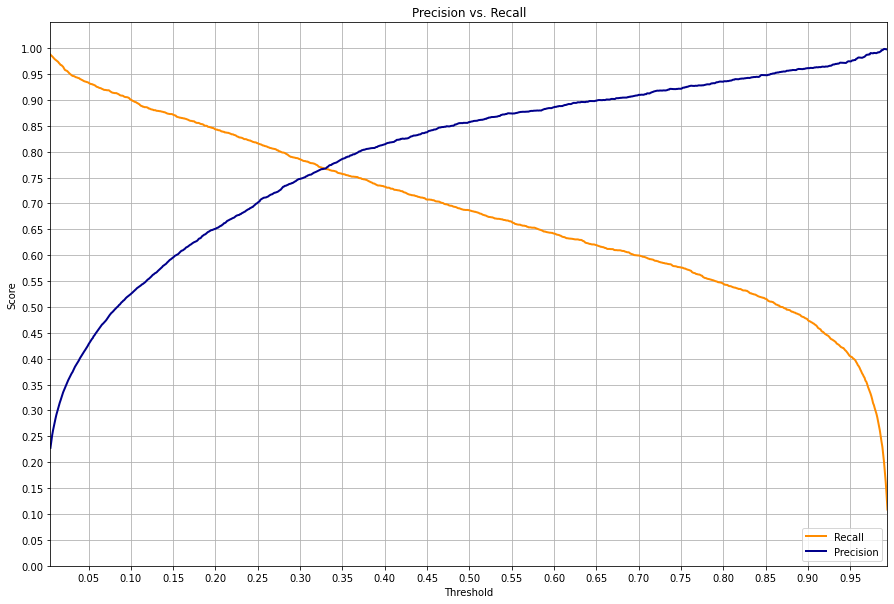

In [26]:
plt.figure(figsize=(15,10))
lw = 2
plt.plot(thresholds, recalls, color='darkorange', lw=lw, label='Recall')
plt.plot(thresholds, precisions, color='darkblue', lw=lw, label='Precision')
plt.grid()
plt.xticks(np.arange(0, 1.05, 0.05))
plt.yticks(np.arange(0, 1.05, 0.05))
plt.xlim([min(thresholds), max(thresholds)])
plt.ylim([0.0, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs. Recall')
plt.legend(loc="lower right")
plt.show()

In [27]:
for i in range(len(recalls)):
  if recalls[i] < min_recall:
    if i > 0:
      print("Recall: {}, precision: {}.".format(recalls[i-1], precisions[i-1]))
    else:
      print ("Cannot achieve recall greater than {}.".format(min_recall))
    break

Recall: [0.9004203], precision: [0.52497644].


## Task 4: BERT classifier

Implement a transofmer–based classifier unsing the BERT model.

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification

bertTokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bertModel = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=1)

Tokenize the documents and create attention masks.

In [30]:
import numpy as np

train_ids=[]
train_masks=[]
test_ids=[]
test_masks=[]


for doc in X_train:
    bert_inp = bertTokenizer.encode_plus(doc, add_special_tokens = True, pad_to_max_length = True, max_length = 100, return_attention_mask = True)
    train_ids.append(np.array(bert_inp['input_ids']))
    train_masks.append(np.array(bert_inp['attention_mask']))

for doc in X_test:
    bert_inp = bertTokenizer.encode_plus(doc, add_special_tokens = True, pad_to_max_length = True, max_length = 100, return_attention_mask = True)
    test_ids.append(np.array(bert_inp['input_ids']))
    test_masks.append(np.array(bert_inp['attention_mask']))

train_ids = np.asarray(train_ids)
train_masks = np.asarray(train_masks)
test_ids = np.asarray(test_ids)
test_masks = np.asarray(test_masks)

print (train_ids.shape)
print (test_ids.shape)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


(92691, 100)
(23173, 100)


In [31]:
import tensorflow as tf

loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
bertModel.compile(loss=loss,optimizer=optimizer,metrics=["accuracy"])

In [32]:
bertModel.fit([train_ids, train_masks], y_train, batch_size=64, epochs=1, validation_data=([test_ids, test_masks], y_test))

1449/1449 [==============================] - 1093s 754ms/step - loss: 0.1529 - accuracy: 0.9411 - val_loss: 0.1289 - val_accuracy: 0.9520


In [33]:
import numpy as np

y_pred_proba = bertModel.predict([test_ids, test_masks])

thresholds = np.arange(0.005, 0.995, 0.001)
precisions, recalls = get_scores(y_test, np.apply_along_axis(lambda x: 1/(1 + np.exp(-x)), 0, y_pred_proba).reshape(-1), thresholds)

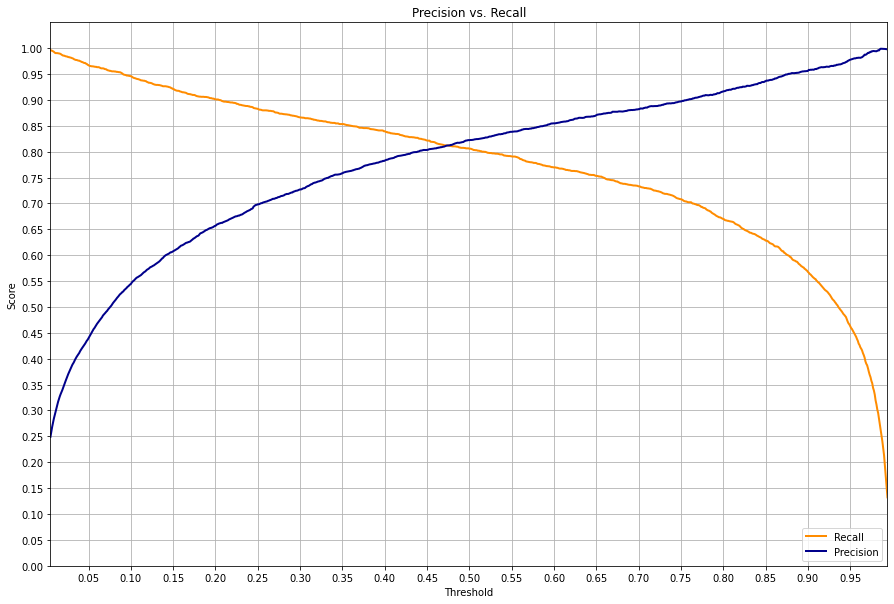

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
lw = 2
plt.plot(thresholds, recalls, color='darkorange', lw=lw, label='Recall')
plt.plot(thresholds, precisions, color='darkblue', lw=lw, label='Precision')
plt.grid()
plt.xticks(np.arange(0, 1.05, 0.05))
plt.yticks(np.arange(0, 1.05, 0.05))
plt.xlim([min(thresholds), max(thresholds)])
plt.ylim([0.0, 1.05])
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs. Recall')
plt.legend(loc="lower right")
plt.show()

In [35]:
for i in range(len(recalls)):
  if recalls[i] < min_recall:
    if i > 0:
      print("Recall: {}, precision: {}.".format(recalls[i-1], precisions[i-1]))
    else:
      print ("Cannot achieve recall greater than {}.".format(min_recall))
    break

Recall: 0.9000969932104753, precision: 0.6609686609686609.
